In [1]:
# Crop and Align
import cv2
import numpy as np
import matplotlib.pyplot as plt
class CardAlignment:
    def __init__(self, visualization=False):
        self.visualization_mode = visualization

    def crop_card(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        max_contour = max(contours, key=cv2.contourArea)
        rect = cv2.minAreaRect(max_contour)
        box = cv2.boxPoints(rect)
        box = np.intp(box)
        card = image.copy()
        cv2.drawContours(card, [box], 0, (0, 255, 0), 2)
        (x, y, w, h) = cv2.boundingRect(box)
        card = card[y:y+h, x:x+w]
        return card, rect

    def align_card(self, card, rect_angle):
       height, width = card.shape[:2]
       if rect_angle < -45:
         rect_angle += 90
       elif rect_angle > 45:
         rect_angle -= 90
       rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rect_angle, 1)
       aligned_card = cv2.warpAffine(card, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)
       return aligned_card
# Function to print the image
def plot_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')
    plt.show()
def process_image(image):
    card_aligner = CardAlignment(visualization=True)
    card, rect = card_aligner.crop_card(image)
    rect_angle = rect[-1]
    aligned_card = card_aligner.align_card(card, rect_angle)

    # Check if additional cropping is required
    gray_aligned = cv2.cvtColor(aligned_card, cv2.COLOR_BGR2GRAY)
    _, thresh_aligned = cv2.threshold(gray_aligned, 1, 255, cv2.THRESH_BINARY)
    contours_aligned, _ = cv2.findContours(thresh_aligned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour_aligned = max(contours_aligned, key=cv2.contourArea)
    rect_aligned = cv2.minAreaRect(max_contour_aligned)
    box_aligned = cv2.boxPoints(rect_aligned)
    box_aligned = np.intp(box_aligned)

    # Calculate bounding box
    (x, y, w, h) = cv2.boundingRect(box_aligned)

    # Apply additional cropping if required
    if x > 0 or y > 0 or x + w < aligned_card.shape[1] or y + h < aligned_card.shape[0]:
        aligned_card = aligned_card[y:y+h, x:x+w]

    # plot_image(aligned_card)
    return aligned_card

# Path to the image file
original_image = cv2.imread(r"E:\IPML\train_data\images\train\20240412_230231.jpg")
# plot_image(original_image)
# Process the image
aligned_image = process_image(original_image)
# Process the image
aligned_image1 = process_image(aligned_image)



# After Cropping

In [2]:
# !pip install pytesseract

# Install the required Tesseract language package for Indian languages
# !sudo apt-get install tesseract-ocr

In [3]:
import pytesseract

In [4]:
pytesseract.pytesseract.tesseract_cmd=r"C:\\Users\\Ritik\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe"

In [5]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
import re
import datetime
import pytz

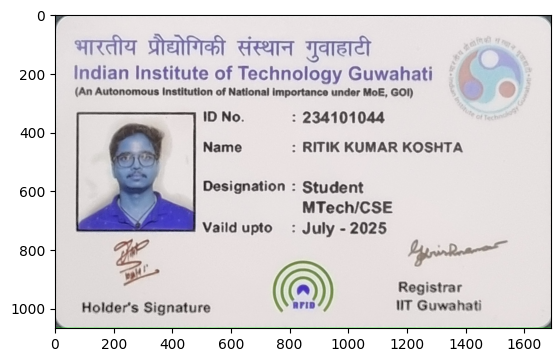

In [7]:
# Read the image
img = aligned_image1.copy()

# Make copies of the image
img_copy = img.copy()
roll_no = img.copy()
name = img.copy()
designation = img.copy()
valadity = img.copy()

# Display the original image
plt.imshow(img)
plt.show()

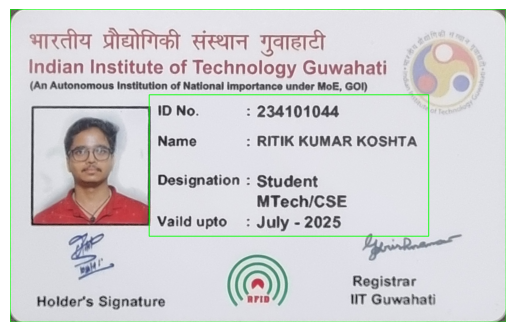

In [8]:
# Get image dimensions
height, width, _ = img.shape

# Calculate the coordinates for the rectangle
top_left = (int(width * (1/4)), int(height * (1/4)))
bottom_right = (int(width * (7/8)), int(height * (3/4)))

# Define shrinkage percentages
shrink_percentage = 0.05

# Calculate the shrinkage amount
shrink_x = int((bottom_right[0] - top_left[0]) * shrink_percentage)
shrink_y = int((bottom_right[1] - top_left[1]) * shrink_percentage)

# Adjust the coordinates to shrink the rectangle
top_left = (top_left[0] + shrink_x, top_left[1] + shrink_y)
bottom_right = (bottom_right[0] - shrink_x, bottom_right[1] - shrink_y)

# Draw the rectangle on the image
green_color = (0, 255, 0)  # Green color in BGR
border_thickness = 2  # Thickness of the border
cv2.rectangle(img_copy, top_left, bottom_right, green_color, border_thickness)

# Convert BGR image to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

# Display the image with the rectangle
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis
plt.show()

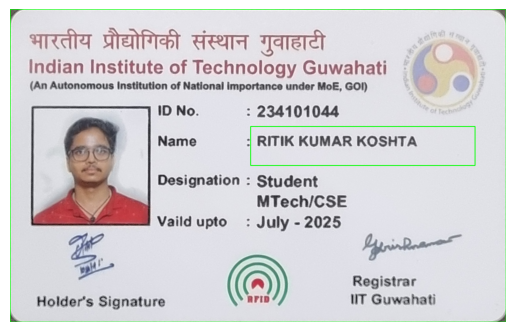

In [9]:
# Define the coordinates for the line rectangle
top_left_1 = (int(width * (1.94/4) ), int(height * (1.5/4)) )
bottom_right_1 = (int(width * (7.5/8)), int(height * (2/4)))

cv2.rectangle(name, top_left_1, bottom_right_1, green_color, border_thickness)

# Convert BGR image to RGB for displaying with matplotlib
img_rgb_1 = cv2.cvtColor(name, cv2.COLOR_BGR2RGB)

# Display the image with the rectangles
plt.imshow(img_rgb_1)
plt.axis('off')  # Turn off axis
plt.show()

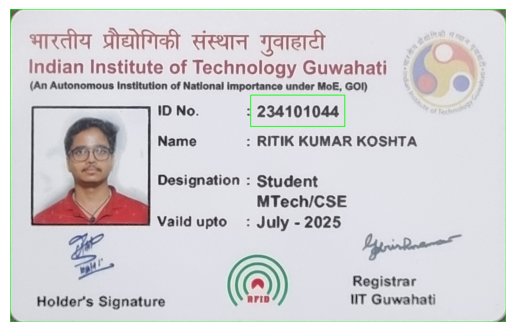

In [10]:
# Define the coordinates for the line rectangle
top_left_2 = (int(width * (1.94/4) ), int(height * (1.1/4)) )
bottom_right_2 = (int(width * (2.7/4)), int(height * (1.5/4)))

cv2.rectangle(roll_no, top_left_2, bottom_right_2, green_color, border_thickness)

# Convert BGR image to RGB for displaying with matplotlib
img_rgb_2 = cv2.cvtColor(roll_no, cv2.COLOR_BGR2RGB)

# Display the image with the rectangles
plt.imshow(img_rgb_2)
plt.axis('off')  # Turn off axis
plt.show()

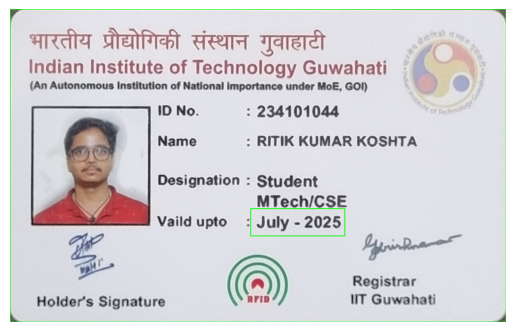

In [11]:
# Define the coordinates for the line rectangle
top_left_3 = (int(width * (1.94/4) ), int(height * (2.55/4)) )
bottom_right_3 = (int(width * (2.7/4)), int(height * (2.9/4)))

cv2.rectangle(valadity, top_left_3, bottom_right_3, green_color, border_thickness)

# Convert BGR image to RGB for displaying with matplotlib
img_rgb_3 = cv2.cvtColor(valadity, cv2.COLOR_BGR2RGB)

# Display the image with the rectangles
plt.imshow(img_rgb_3)
plt.axis('off')  # Turn off axis
plt.show()

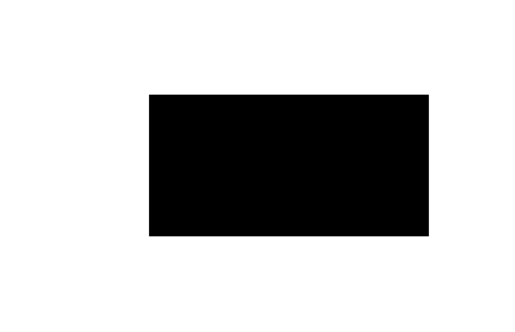

In [12]:
# Create a mask to cover the entire image
mask_0 = np.zeros((height, width), dtype=np.uint8)

# Draw the filled rectangle on the mask
cv2.rectangle(mask_0, top_left, bottom_right, (255), -1)

# Invert the mask
mask_0 = cv2.bitwise_not(mask_0)

# Create a white image
white_image = np.ones_like(img_copy) * 255

# Combine the original image and the white image using the mask
result = cv2.bitwise_or(img_copy, white_image, mask=mask_0)

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

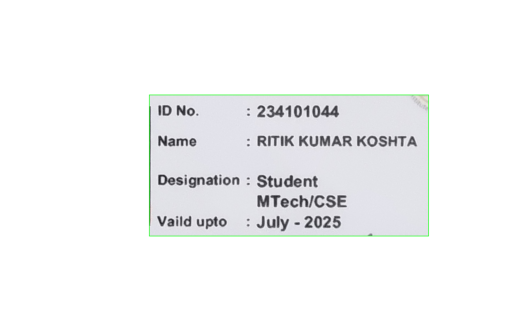

In [13]:
# Iterate over each pixel in the result image
for y in range(result.shape[0]):
    for x in range(result.shape[1]):
        # If the pixel in the result image is white
        if np.all(result[y, x] == [255, 255, 255]):
            # Set the corresponding pixel in the copy image to white
            img_copy[y, x] = [255, 255, 255]

# Display the result
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

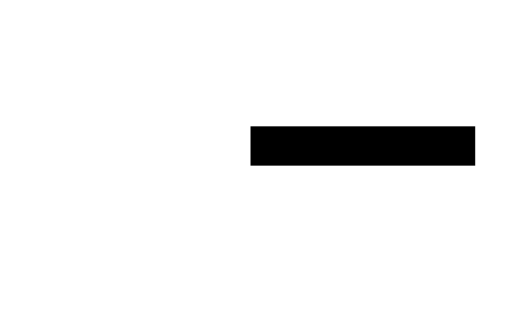

In [14]:
# Create a mask to cover the entire image
mask1 = np.zeros((height, width), dtype=np.uint8)

# Draw the filled rectangle on the mask
cv2.rectangle(mask1, top_left_1, bottom_right_1, (255), -1)

# Invert the mask
mask1 = cv2.bitwise_not(mask1)

# Create a white image
white_image_1 = np.ones_like(name) * 255

# Combine the original image and the white image using the mask
result_1 = cv2.bitwise_or(name, white_image_1, mask = mask1)

# Display the result
plt.imshow(cv2.cvtColor(result_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

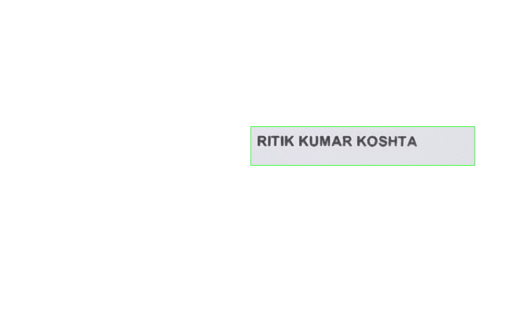

In [15]:
# Iterate over each pixel in the result image
for y in range(result_1.shape[0]):
    for x in range(result_1.shape[1]):
        # If the pixel in the result image is white
        if np.all(result_1[y, x] == [255, 255, 255]):
            # Set the corresponding pixel in the copy image to white
            name[y, x] = [255, 255, 255]

# Display the result
plt.imshow(cv2.cvtColor(name, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

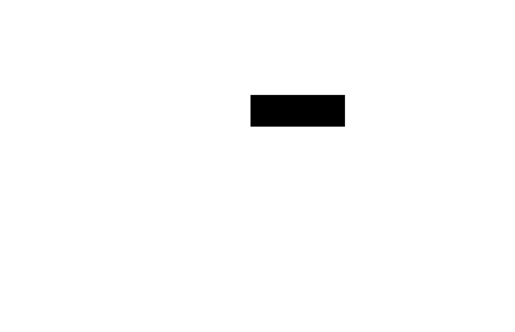

In [16]:
# Create a mask to cover the entire image
mask2 = np.zeros((height, width), dtype=np.uint8)

# Draw the filled rectangle on the mask
cv2.rectangle(mask2, top_left_2, bottom_right_2, (255), -1)

# Invert the mask
mask2 = cv2.bitwise_not(mask2)

# Create a white image
white_image_2 = np.ones_like(name) * 255

# Combine the original image and the white image using the mask
result_2 = cv2.bitwise_or(name, white_image_2, mask = mask2)

# Display the result
plt.imshow(cv2.cvtColor(result_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

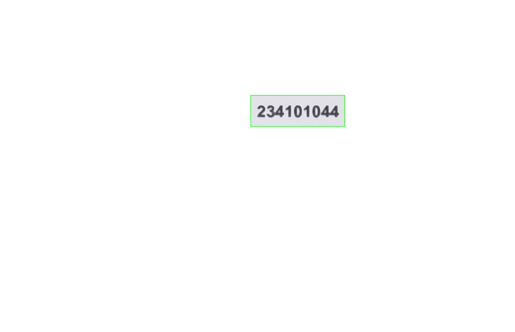

In [17]:
# Iterate over each pixel in the result image
for y in range(result_2.shape[0]):
    for x in range(result_2.shape[1]):
        # If the pixel in the result image is white
        if np.all(result_2[y, x] == [255, 255, 255]):
            # Set the corresponding pixel in the copy image to white
            roll_no[y, x] = [255, 255, 255]

# Display the result
plt.imshow(cv2.cvtColor(roll_no, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

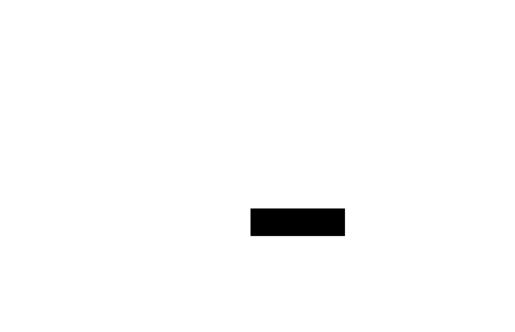

In [18]:
# Create a mask to cover the entire image
mask3 = np.zeros((height, width), dtype=np.uint8)

# Draw the filled rectangle on the mask
cv2.rectangle(mask3, top_left_3, bottom_right_3, (255), -1)

# Invert the mask
mask3 = cv2.bitwise_not(mask3)

# Create a white image
white_image_3 = np.ones_like(name) * 255

# Combine the original image and the white image using the mask
result_3 = cv2.bitwise_or(name, white_image_3, mask = mask3)

# Display the result
plt.imshow(cv2.cvtColor(result_3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

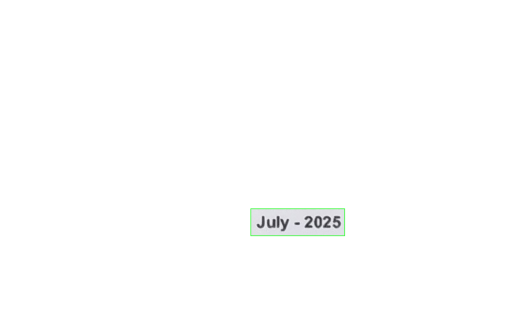

In [19]:
# Iterate over each pixel in the result image
for y in range(result_3.shape[0]):
    for x in range(result_3.shape[1]):
        # If the pixel in the result image is white
        if np.all(result_3[y, x] == [255, 255, 255]):
            # Set the corresponding pixel in the copy image to white
            valadity[y, x] = [255, 255, 255]

# Display the result
plt.imshow(cv2.cvtColor(valadity, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

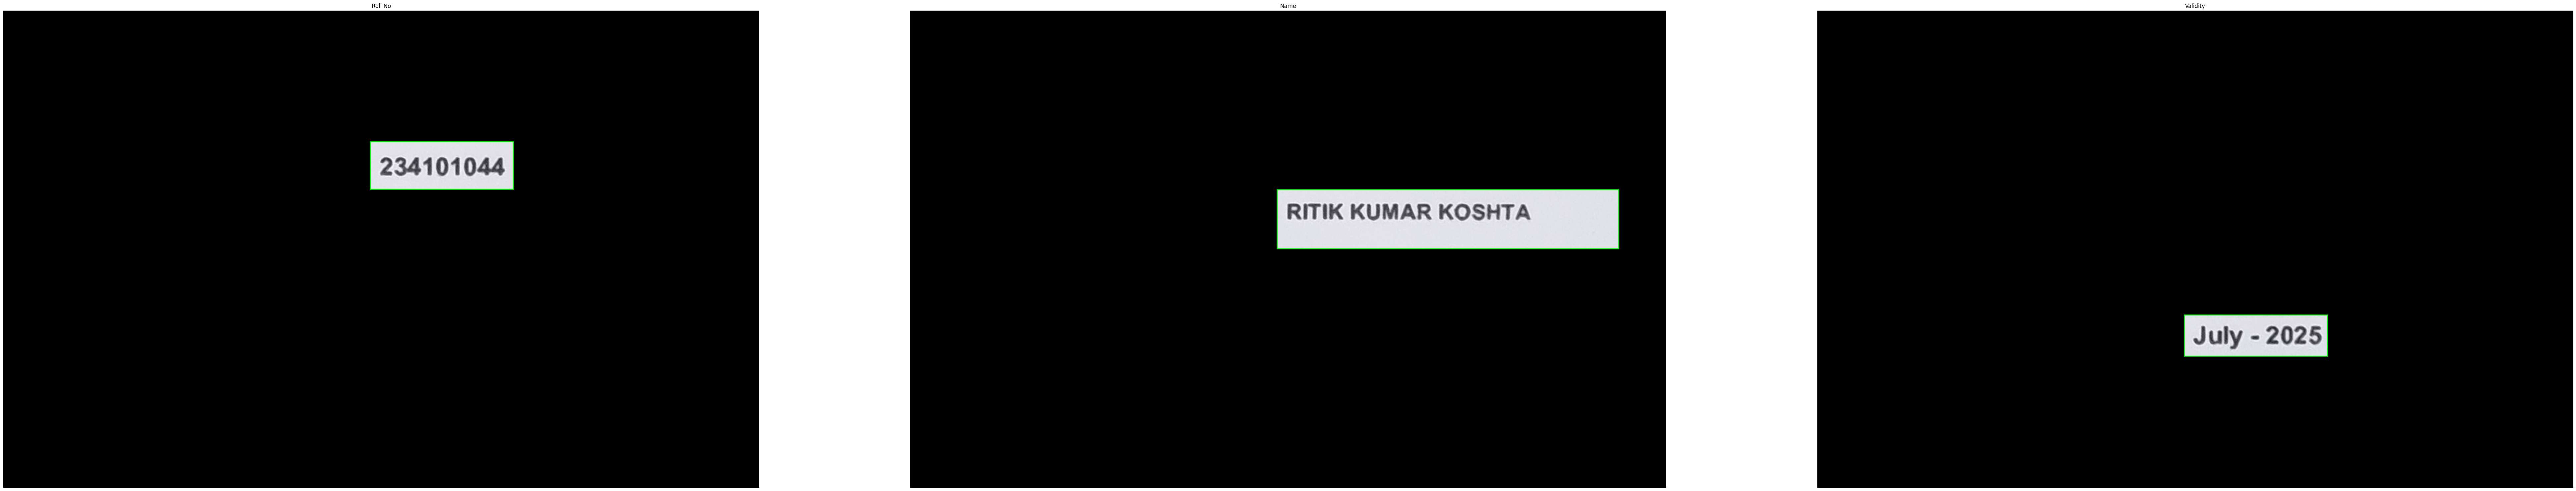

In [20]:
# Convert the images to grayscale
roll_no_gray = cv2.cvtColor(roll_no, cv2.COLOR_BGR2GRAY)
name_gray = cv2.cvtColor(name, cv2.COLOR_BGR2GRAY)
validity_gray = cv2.cvtColor(valadity, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to segment the images into black and white regions
_, roll_no_binary = cv2.threshold(roll_no_gray, 254, 255, cv2.THRESH_BINARY)
_, name_binary = cv2.threshold(name_gray, 253, 255, cv2.THRESH_BINARY)
_, validity_binary = cv2.threshold(validity_gray, 253, 255, cv2.THRESH_BINARY)

# Invert the binary images
roll_no_binary = cv2.bitwise_not(roll_no_binary)
name_binary = cv2.bitwise_not(name_binary)
validity_binary = cv2.bitwise_not(validity_binary)

# Apply the inverted binary masks to the original images
roll_no_result = cv2.bitwise_and(roll_no, roll_no, mask=roll_no_binary)
name_result = cv2.bitwise_and(name, name, mask=name_binary)
validity_result = cv2.bitwise_and(valadity, valadity, mask=validity_binary)

# Display the results
plt.figure(figsize=(100, 50))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(roll_no_result, cv2.COLOR_BGR2RGB))
plt.title("Roll No")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(name_result, cv2.COLOR_BGR2RGB))
plt.title("Name")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(validity_result, cv2.COLOR_BGR2RGB))
plt.title("Validity")
plt.axis('off')

plt.show()

In [21]:
# Use Tesseract to recognize text
text_1 = pytesseract.image_to_string(roll_no_result, lang="eng")
lines_1 = text_1.split("\n")

# Use Tesseract to recognize text
text_2 = pytesseract.image_to_string(name_result, lang="eng")
lines_2 = text_2.split("\n")

# Use Tesseract to recognize text
text_3 = pytesseract.image_to_string(validity_result, lang="eng")
lines_3 = text_3.split("\n")


In [22]:
# Use regular expressions to find a 9-digit number
roll_no_match = re.search(r'\b\d{9}\b', lines_1[0])

# If a match is found, print the roll number
if roll_no_match:
    roll_no = roll_no_match.group(0)
    print("Roll No:", roll_no)
else:
    print("No 9-digit number found in the string")

Roll No: 234101044


In [23]:
# Remove unnecessary white spaces and symbols from the beginning and end of the string
lines_2[0] = lines_2[0].strip()

# Use regular expressions to find the name written in capital letters
name_match = re.search(r'\b[A-Z\s]+\b', lines_2[0])

# If a match is found, print the name
if name_match:
    extracted_name = name_match.group(0)
    print("Name:", extracted_name)
else:
    print("No name written in capital letters found in the string")

Name: RITIK KUMAR KOSHTA


In [24]:
# Use regular expressions to find a 4-digit year
valadity_match = re.search(r'\b\d{4}\b', lines_3[0])

# If a match is found, print the roll number
if valadity_match:
    roll_no = valadity_match.group(0)
    print("Vaild Upto: July-", valadity_match)
else:
    print("No 4-digit year found in the string")

Vaild Upto: July- <re.Match object; span=(7, 11), match='2025'>


In [25]:
# Get current system clock time in Indian Standard Time (IST)
timezone = pytz.timezone('Asia/Kolkata')  # Set timezone to IST
current_time = datetime.datetime.now(timezone).strftime("%H:%M:%S")

In [26]:
print("Roll No:", roll_no)
print("Name:", extracted_name)
print("Vaild Upto: July-", valadity_match)
print("Entery Time:", current_time)

Roll No: 2025
Name: RITIK KUMAR KOSHTA
Vaild Upto: July- <re.Match object; span=(7, 11), match='2025'>
Entery Time: 13:21:02


# **Last Phase**

1.   If some exception encountered or card is demaged Get info based on Roll_no from Databse.
2.   Put data in Data Sheet.
1.   Next Itetration.